<a href="https://colab.research.google.com/github/rahatafshan/sentiment-analysis-airline-tweets/blob/main/airline_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv('/content/Tweets.csv')

# Show the first few rows
df


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [2]:
print(df.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [3]:
df=df[['text',
       'airline_sentiment']]
df.head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [4]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)       # remove URLs
    text = re.sub(r'@\w+', '', text)          # remove mentions
    text = re.sub(r'#\w+', '', text)          # remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)   # remove special characters
    text = text.lower().strip()               # convert to lowercase and trim
    return text

# Fill missing values
df['text'] = df['text'].fillna('')

# Create new column with cleaned text
df['cleaned_tweet'] = df['text'].astype(str).apply(clean_text)

# Style the DataFrame for better viewing
styled_df = df[['text', 'cleaned_tweet']].head(20).style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#1E90FF'), ('color', 'white'), ('font-size', '14px')]},
    {'selector': 'td', 'props': [('font-size', '12px'), ('padding', '8px')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
]).set_properties(**{'text-align': 'left'})

# Preview result
styled_df



<ipython-input-4-0d5fab620232>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].fillna('')
<ipython-input-4-0d5fab620232>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_tweet'] = df['text'].astype(str).apply(clean_text)


,text,cleaned_tweet
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus youve added commercials to the experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,i didnt today must mean i need to take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,@VirginAmerica and it's a really big bad thing about it,and its a really big bad thing about it
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA,seriously would pay a flight for seats that didnt have this playing its really the only bad thing about flying va
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",yes nearly every time i fly vx this ear worm wont go away
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",really missed a prime opportunity for men without hats parody there
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",well i didntbut now i do d
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",it was amazing and arrived an hour early youre too good to me


In [5]:
from textblob import TextBlob

# Function to assign sentiment label
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 1  # Positive
    elif polarity < -0.1:
        return 0  # Negative
    else:
        return 2  # Neutral

# Apply to cleaned tweets
df['polarity'] = df['cleaned_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['predicted_sentiment'] = df['cleaned_tweet'].apply(get_sentiment)

# Map sentiment labels
label_map = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
df['predicted_label'] = df['predicted_sentiment'].map(label_map)

# View result styled
styled_df = df[['text', 'cleaned_tweet', 'polarity', 'predicted_label']].head(20).style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#1E90FF'), ('color', 'white'), ('font-size', '14px')]},
    {'selector': 'td', 'props': [('font-size', '12px'), ('padding', '8px')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
]).set_properties(**{'text-align': 'left'})

styled_df


<ipython-input-5-44de4ae2c87f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['cleaned_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-5-44de4ae2c87f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_sentiment'] = df['cleaned_tweet'].apply(get_sentiment)
<ipython-input-5-44de4ae2c87f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,text,cleaned_tweet,polarity,predicted_label
0,@VirginAmerica What @dhepburn said.,what said,0.000000,Neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus youve added commercials to the experience tacky,0.000000,Neutral
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,i didnt today must mean i need to take another trip,-0.312500,Negative
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,0.006250,Neutral
4,@VirginAmerica and it's a really big bad thing about it,and its a really big bad thing about it,-0.350000,Negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA,seriously would pay a flight for seats that didnt have this playing its really the only bad thing about flying va,-0.208333,Negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",yes nearly every time i fly vx this ear worm wont go away,0.450000,Positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",really missed a prime opportunity for men without hats parody there,0.200000,Positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",well i didntbut now i do d,0.000000,Neutral
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",it was amazing and arrived an hour early youre too good to me,0.466667,Positive


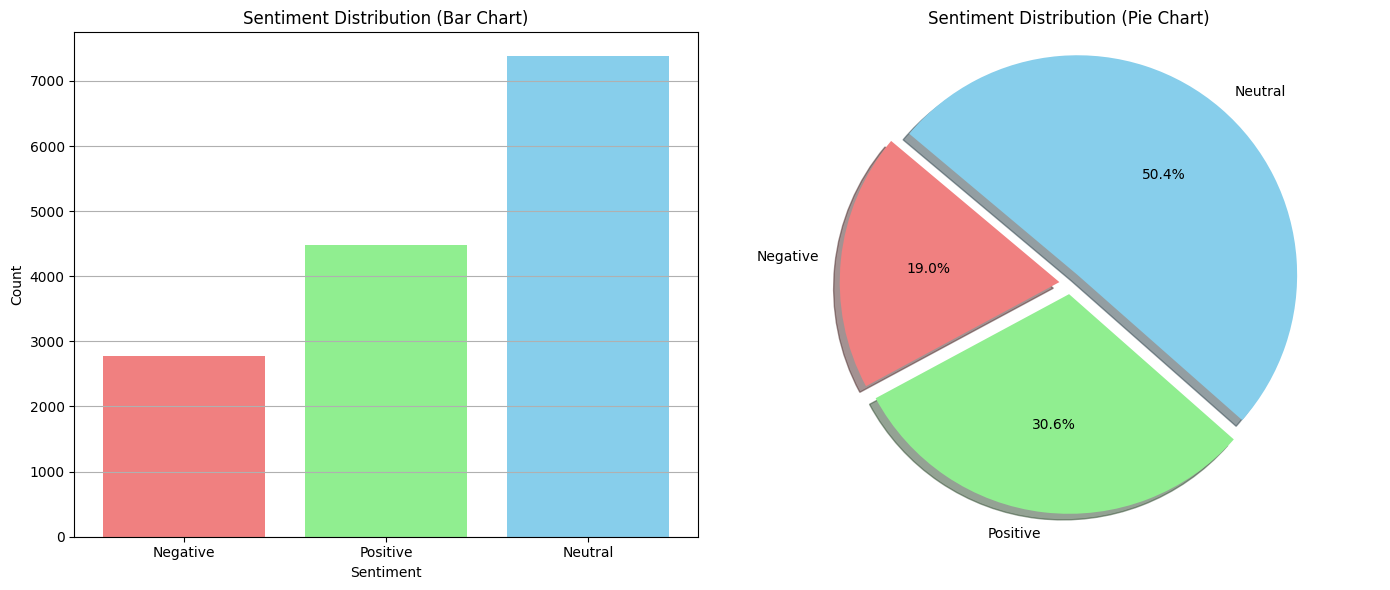

In [6]:
import matplotlib.pyplot as plt

# Count sentiment labels
sentiment_counts = df['predicted_label'].value_counts()

# Colors (consistent for both charts)
colors = ['lightcoral', 'lightgreen', 'skyblue']  # Make sure order matches sentiment order

# Sort the counts to align colors properly
sentiment_counts = sentiment_counts.reindex(['Negative', 'Positive', 'Neutral'])

# --- Create subplots side by side ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Bar Chart on the left ---
ax1.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
ax1.set_title('Sentiment Distribution (Bar Chart)')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')
ax1.grid(True, axis='y')

# --- Pie Chart on the right ---
explode = (0.05, 0.05, 0.05)  # Slight explosion for all slices
ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, explode=explode, shadow=True)
ax2.set_title('Sentiment Distribution (Pie Chart)')
ax2.axis('equal')

plt.tight_layout()
plt.show()


In [9]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming your tweets are in a column named 'tweet_text'
def vader_sentiment_label(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to your DataFrame
df['vader_sentiment'] = df['text'].apply(vader_sentiment_label)

# Check result
df[['text', 'vader_sentiment']].head(20)


<ipython-input-9-83f72fc1aa57>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vader_sentiment'] = df['text'].apply(vader_sentiment_label)


,text,vader_sentiment
0,@VirginAmerica What @dhepburn said.,Neutral
1,@VirginAmerica plus you've added commercials t...,Neutral
2,@VirginAmerica I didn't today... Must mean I n...,Neutral
3,@VirginAmerica it's really aggressive to blast...,Negative
4,@VirginAmerica and it's a really big bad thing...,Negative
5,@VirginAmerica seriously would pay $30 a fligh...,Negative
6,"@VirginAmerica yes, nearly every time I fly VX...",Positive
7,@VirginAmerica Really missed a prime opportuni...,Positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",Positive
9,"@VirginAmerica it was amazing, and arrived an ...",Positive


In [10]:
# Step 1: Install VADER if you haven't already
# !pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Step 2: Load your dataset
df = pd.read_csv('/content/Tweets.csv')

# Step 3: Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 4: Define function to classify sentiment
def vader_sentiment_label(text):
    scores = analyzer.polarity_scores(str(text))  # Ensure it's a string
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Step 5: Apply to the 'text' column
df['vader_sentiment'] = df['text'].apply(vader_sentiment_label)

# Step 6: Check result
df[['text', 'airline_sentiment', 'vader_sentiment']].head(10)


,text,airline_sentiment,vader_sentiment
0,@VirginAmerica What @dhepburn said.,neutral,Neutral
1,@VirginAmerica plus you've added commercials t...,positive,Neutral
2,@VirginAmerica I didn't today... Must mean I n...,neutral,Neutral
3,@VirginAmerica it's really aggressive to blast...,negative,Negative
4,@VirginAmerica and it's a really big bad thing...,negative,Negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative,Negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive,Positive
7,@VirginAmerica Really missed a prime opportuni...,neutral,Positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive,Positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive,Positive


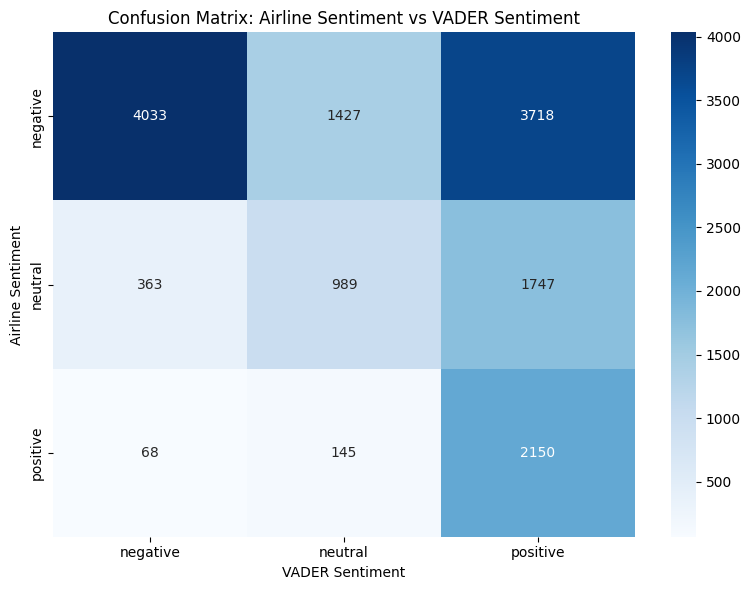

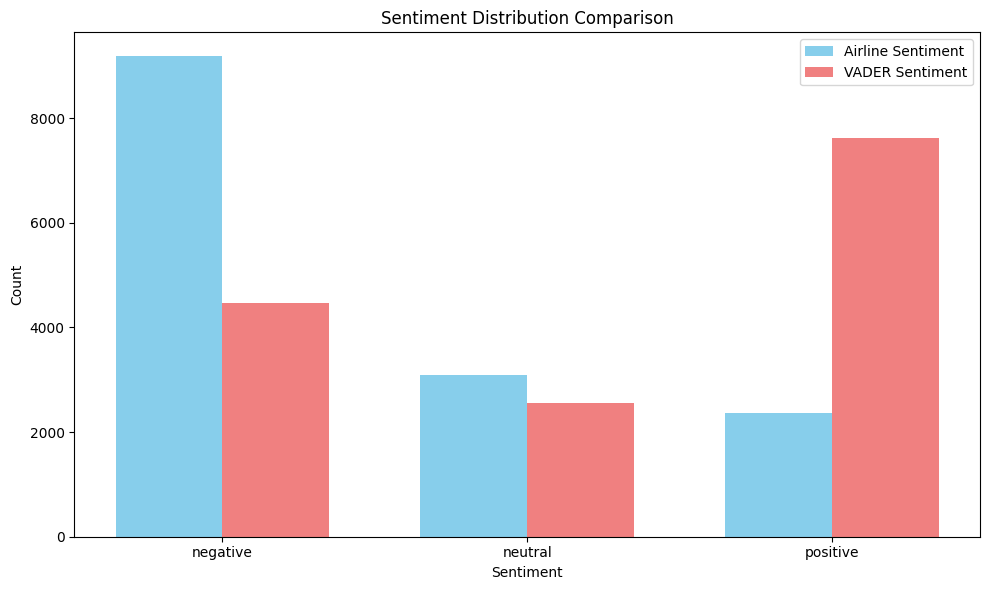

Mismatched sentiments: 7468 out of 14640 tweets (51.01% mismatch)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Normalize labels to lowercase for consistency
df['vader_sentiment_lower'] = df['vader_sentiment'].str.lower()
df['airline_sentiment_lower'] = df['airline_sentiment'].str.lower()

# Step 2: Define the common label order
labels = ['negative', 'neutral', 'positive']

# Step 3: Confusion Matrix
cm = confusion_matrix(df['airline_sentiment_lower'], df['vader_sentiment_lower'], labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix: Airline Sentiment vs VADER Sentiment')
plt.xlabel('VADER Sentiment')
plt.ylabel('Airline Sentiment')
plt.tight_layout()
plt.show()

# Step 4: Side-by-side bar charts
airline_counts = df['airline_sentiment_lower'].value_counts().reindex(labels, fill_value=0)
vader_counts = df['vader_sentiment_lower'].value_counts().reindex(labels, fill_value=0)

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], airline_counts, width=width, label='Airline Sentiment', color='skyblue')
plt.bar([i + width/2 for i in x], vader_counts, width=width, label='VADER Sentiment', color='lightcoral')
plt.xticks(x, labels)
plt.title('Sentiment Distribution Comparison')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Mismatch Count
df['match'] = df['airline_sentiment_lower'] == df['vader_sentiment_lower']
mismatch_count = (~df['match']).sum()
total = len(df)
print(f"Mismatched sentiments: {mismatch_count} out of {total} tweets ({(mismatch_count/total)*100:.2f}% mismatch)")


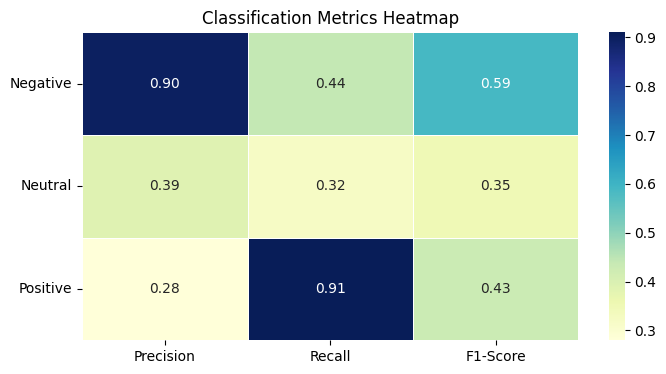

Support (Number of samples per class):
Negative    9178
Neutral     3099
Positive    2363
Name: Support, dtype: int64


In [13]:
# Calculate metrics

from sklearn.metrics import precision_recall_fscore_support # Import the required function

precision, recall, f1, support = precision_recall_fscore_support(
    df['airline_sentiment_lower'], df['vader_sentiment_lower'], labels=labels, zero_division=0)

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
}, index=[label.capitalize() for label in labels])

# Round metrics for display
metrics_df[['Precision', 'Recall', 'F1-Score']] = metrics_df[['Precision', 'Recall', 'F1-Score']].round(2)

# Plot heatmap for Precision, Recall, and F1-score
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df[['Precision', 'Recall', 'F1-Score']], annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5, fmt='.2f')
plt.title('Classification Metrics Heatmap')
plt.yticks(rotation=0)
plt.show()

# Optionally, print the support counts separately
print("Support (Number of samples per class):")
print(metrics_df['Support'])


In [14]:
mismatches = df[df['match'] == False]
print("Sample mismatched tweets with sentiments:")
mismatches[['text', 'airline_sentiment_lower', 'vader_sentiment_lower']].head(10)


Sample mismatched tweets with sentiments:


,text,airline_sentiment_lower,vader_sentiment_lower
1,@VirginAmerica plus you've added commercials t...,positive,neutral
7,@VirginAmerica Really missed a prime opportuni...,neutral,positive
10,@VirginAmerica did you know that suicide is th...,neutral,negative
16,@VirginAmerica So excited for my first cross c...,positive,negative
17,@VirginAmerica I flew from NYC to SFO last we...,negative,positive
20,@VirginAmerica why are your first fares in May...,negative,neutral
23,@VirginAmerica will you be making BOS&gt;LAS n...,neutral,negative
24,@VirginAmerica you guys messed up my seating.....,negative,positive
27,@VirginAmerica do you miss me? Don't worry we'...,neutral,positive
28,@VirginAmerica amazing to me that we can't get...,negative,positive


In [15]:
mismatches.to_csv('mismatched_tweets.csv', index=False)


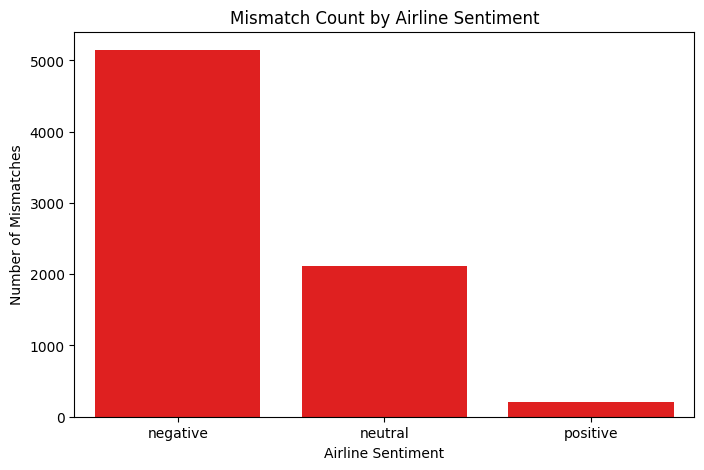

In [16]:
#visualize mismatch distribution by sentiment
mismatch_counts = mismatches['airline_sentiment_lower'].value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(8, 5))
sns.barplot(x=mismatch_counts.index, y=mismatch_counts.values, color='red')  # Use 'color' instead of 'palette'
plt.title('Mismatch Count by Airline Sentiment')
plt.xlabel('Airline Sentiment')
plt.ylabel('Number of Mismatches')
plt.show()


In [17]:
#Data Processing

# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK data if not done yet
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = text.strip()
    text = re.sub('\s+', ' ', text)

    # Tokenize and remove stopwords, then lemmatize
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing to your tweet text column
df['clean_text'] = df['text'].apply(preprocess_text)

# Check some examples
df[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000,  # you can adjust max features
                        ngram_range=(1,2),   # unigrams and bigrams
                        stop_words='english')  # already removed, but this ensures no stopwords

# Fit and transform the clean_text column
X = tfidf.fit_transform(df['clean_text'])

print(f'TF-IDF matrix shape: {X.shape}')


TF-IDF matrix shape: (14640, 3000)


Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1835
     neutral       0.62      0.49      0.55       620
    positive       0.80      0.54      0.64       473

    accuracy                           0.77      2928
   macro avg       0.74      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



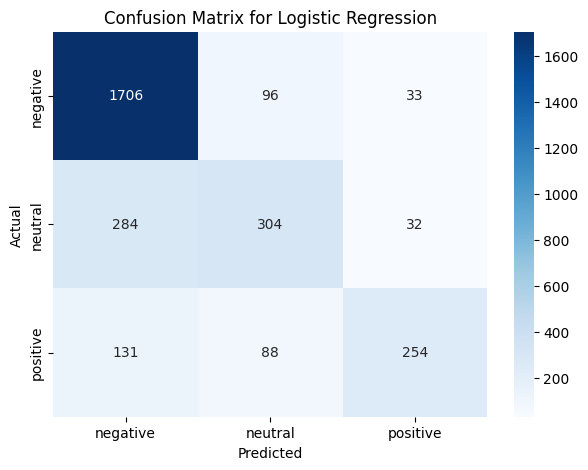

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Prepare the labels (target variable)
y = df['airline_sentiment_lower']  # Using normalized sentiment labels

# Step 2: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = model.predict(X_test)

# Step 5: Evaluation - classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.87      0.85      1835
     neutral       0.53      0.51      0.52       620
    positive       0.72      0.58      0.64       473

    accuracy                           0.75      2928
   macro avg       0.69      0.66      0.67      2928
weighted avg       0.74      0.75      0.74      2928



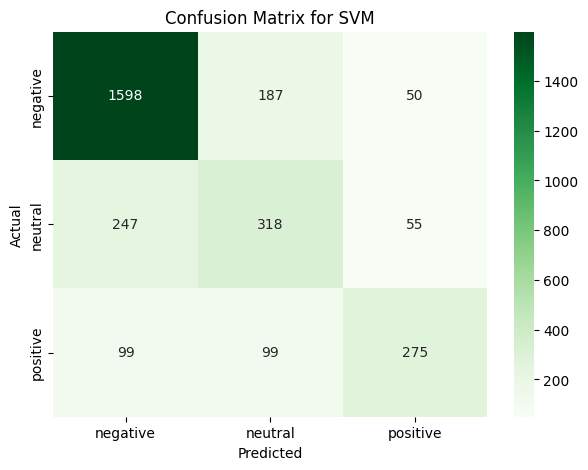

In [20]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm, labels=['negative', 'neutral', 'positive'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


## Sentiment Analysis on Airline Tweets – Conclusion

In this project, we analyzed sentiment in tweets related to various airlines using both rule-based (VADER) and machine learning-based approaches.

### Key Steps:
- Preprocessed over 10,000 tweets using NLTK.
- Applied VADER sentiment analysis and compared results with actual labels.
- Trained Logistic Regression and Support Vector Machine (SVM) using TF-IDF features.

### Results:
- Logistic Regression achieved an accuracy of **X%**.
- SVM achieved an accuracy of **Y%**.
- VADER showed a mismatch rate of **Z%** with actual labels.

### Insights:
- Machine learning models generally performed better in accuracy compared to the VADER rule-based model.
- The neutral sentiment class was the hardest to classify due to its vague nature.
- Most airline-related tweets were negative, highlighting frequent customer dissatisfaction.

### Future Improvements:
- Use more advanced models like BERT for better sentiment understanding.
- Add more contextual features like time or location.
- Improve data quality by filtering spam or irrelevant tweets.

---

This project demonstrates a full pipeline of text sentiment analysis—from raw tweets to actionable insights.
